In [1]:
import polars as pl

def load_and_clean_data(df):
    # Remove cancelled flights
    df = df.filter(pl.col('CANCELLED') == 0)
    
    # Drop only non-delay related unnecessary columns
    columns_to_drop = [
        'CANCELLED',             # Already filtered
        'CANCELLATION_REASON',   # Not relevant for delay prediction
        'DIVERTED',             # Not focusing on diverted flights
        'TAIL_NUMBER'           # Aircraft specific identifier
    ]
    df = df.drop(columns_to_drop)
    
    # Keep delay-related columns:
    # - DEPARTURE_DELAY
    # - ARRIVAL_DELAY
    # - AIR_SYSTEM_DELAY
    # - SECURITY_DELAY
    # - AIRLINE_DELAY
    # - LATE_AIRCRAFT_DELAY
    # - WEATHER_DELAY
    
    return df

# Load and clean the data
flights_df = pl.read_csv("flights.csv")
cleaned_df = load_and_clean_data(flights_df)

# Display retained delay-related columns
delay_columns = [col for col in cleaned_df.columns if 'DELAY' in col]
print("\nRetained delay-related columns:", delay_columns)
print("\nInitial cleaning completed. Shape:", cleaned_df.shape)

# Display summary statistics for delay columns
print("\nDelay columns summary statistics:")
print(cleaned_df.select(delay_columns).describe())


Retained delay-related columns: ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

Initial cleaning completed. Shape: (5729195, 25)

Delay columns summary statistics:
shape: (9, 8)
┌────────────┬───────────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┐
│ statistic  ┆ DEPARTURE_DEL ┆ ARRIVAL_DELA ┆ AIR_SYSTEM_D ┆ SECURITY_DEL ┆ AIRLINE_DELA ┆ LATE_AIRCRAF ┆ WEATHER_DELA │
│ ---        ┆ AY            ┆ Y            ┆ ELAY         ┆ AY           ┆ Y            ┆ T_DELAY      ┆ Y            │
│ str        ┆ ---           ┆ ---          ┆ ---          ┆ ---          ┆ ---          ┆ ---          ┆ ---          │
│            ┆ f64           ┆ f64          ┆ f64          ┆ f64          ┆ f64          ┆ f64          ┆ f64          │
╞════════════╪═══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│ count   

In [2]:
cleaned_df.describe()

statistic,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
str,f64,f64,f64,f64,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",5.729195e6,5.729195e6,5.729195e6,5.729195e6,"""5729195""",5.729195e6,"""5729195""","""5729195""",5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729194e6,5.714008e6,5.714008e6,5.729195e6,5.726566e6,5.729195e6,5.726566e6,5.714008e6,1.063439e6,1.063439e6,1.063439e6,1.063439e6,1.063439e6
"""null_count""",0.0,0.0,0.0,0.0,"""0""",0.0,"""0""","""0""",0.0,0.0,0.0,0.0,1.0,15187.0,15187.0,0.0,2629.0,0.0,2629.0,15187.0,4.665756e6,4.665756e6,4.665756e6,4.665756e6,4.665756e6
"""mean""",2015.0,6.547562,15.708485,3.932479,null,2164.752836,null,null,1328.890409,1335.102392,9.338837,16.071118,141.948032,137.006189,113.511628,824.857503,7.434971,1493.315126,1476.491188,4.407057,13.480568,0.076154,18.969547,23.472838,2.91529
"""std""",0.0,3.397027,8.774635,1.986101,null,1754.923501,null,null,483.46922,496.39018,36.992462,8.894483,75.335006,74.211072,72.230822,608.79917,5.638548,506.83602,526.319737,39.271297,28.003679,2.14346,48.161642,43.197018,20.433336
"""min""",2015.0,1.0,1.0,1.0,"""AA""",1.0,"""10135""","""10135""",1.0,1.0,-82.0,1.0,18.0,14.0,7.0,31.0,1.0,1.0,1.0,-87.0,0.0,0.0,0.0,0.0,0.0
"""25%""",2015.0,4.0,8.0,2.0,null,728.0,null,null,916.0,921.0,-5.0,11.0,86.0,82.0,60.0,373.0,4.0,1110.0,1059.0,-13.0,0.0,0.0,0.0,0.0,0.0
"""50%""",2015.0,7.0,16.0,4.0,null,1681.0,null,null,1325.0,1330.0,-2.0,14.0,123.0,118.0,94.0,650.0,6.0,1520.0,1512.0,-5.0,2.0,0.0,2.0,3.0,0.0
"""75%""",2015.0,9.0,23.0,6.0,null,3212.0,null,null,1730.0,1740.0,7.0,19.0,174.0,168.0,144.0,1066.0,9.0,1917.0,1917.0,8.0,18.0,0.0,19.0,29.0,0.0
"""max""",2015.0,12.0,31.0,7.0,"""WN""",9320.0,"""YUM""","""YUM""",2359.0,2400.0,1988.0,225.0,718.0,766.0,690.0,4983.0,248.0,2400.0,2400.0,1971.0,1134.0,573.0,1971.0,1331.0,1211.0


In [3]:
def clean_data(df):
    # Define columns with null values (from null_count statistics)
    columns_to_fill = [
        'SCHEDULED_TIME',          # 1 null
        'ELAPSED_TIME',           # 15,187 nulls
        'AIR_TIME',              # 15,187 nulls
        'TAXI_IN',               # 2,629 nulls
        'ARRIVAL_TIME',          # 2,629 nulls
        'ARRIVAL_DELAY',         # 15,187 nulls
        'AIR_SYSTEM_DELAY',      # 4,665,756 nulls
        'SECURITY_DELAY',        # 4,665,756 nulls
        'AIRLINE_DELAY',         # 4,665,756 nulls
        'LATE_AIRCRAFT_DELAY',   # 4,665,756 nulls
        'WEATHER_DELAY'          # 4,665,756 nulls
    ]
    
    # Fill missing values with 0
    for col in columns_to_fill:
        if col in df.columns:
            df = df.with_columns([
                pl.col(col).fill_null(0)
            ])
    
    # 3. Convert time columns to minutes
    time_columns = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 
                   'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']
    
    for col in time_columns:
        df = df.with_columns([
            pl.when(pl.col(col).is_not_null())
              .then(pl.col(col).cast(pl.Int32).mod(2400).truediv(100).floor() * 60 + 
                    pl.col(col).cast(pl.Int32).mod(100))
              .otherwise(0)
              .alias(f'{col}_MINUTES')
        ])
    
    # 4. Drop unnecessary columns
    columns_to_drop =  time_columns  # Add original time columns to drop list
    
    df = df.drop(columns_to_drop)
    
    return df

In [4]:
filled_cleaned_df = clean_data(cleaned_df)

In [5]:
filled_cleaned_df.head()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SCHEDULED_DEPARTURE_MINUTES,DEPARTURE_TIME_MINUTES,SCHEDULED_ARRIVAL_MINUTES,ARRIVAL_TIME_MINUTES
i64,i64,i64,i64,str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64
2015,1,1,4,"""AS""",98,"""ANC""","""SEA""",-11,21,205,194,169,1448,4,-22,0,0,0,0,0,5.0,1434.0,270.0,248.0
2015,1,1,4,"""AA""",2336,"""LAX""","""PBI""",-8,12,280,279,263,2330,4,-9,0,0,0,0,0,10.0,2.0,470.0,461.0
2015,1,1,4,"""US""",840,"""SFO""","""CLT""",-2,16,286,293,266,2296,11,5,0,0,0,0,0,20.0,18.0,486.0,491.0
2015,1,1,4,"""AA""",258,"""LAX""","""MIA""",-5,15,285,281,258,2342,8,-9,0,0,0,0,0,20.0,15.0,485.0,476.0
2015,1,1,4,"""AS""",135,"""SEA""","""ANC""",-1,11,235,215,199,1448,5,-21,0,0,0,0,0,25.0,24.0,200.0,179.0


In [6]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical(df):
    # 1. Encode categorical columns
    categorical_columns = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
    
    for col in categorical_columns:
        le = LabelEncoder()
        df = df.with_columns([
            pl.Series(le.fit_transform(df[col].to_numpy())).alias(f'{col}_ENCODED')
        ])
    
    # 2. Drop original categorical columns
    df = df.drop(categorical_columns)
    
    return df

In [7]:
encoded_df = encode_categorical(filled_cleaned_df)

In [8]:
encoded_df.head()

YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SCHEDULED_DEPARTURE_MINUTES,DEPARTURE_TIME_MINUTES,SCHEDULED_ARRIVAL_MINUTES,ARRIVAL_TIME_MINUTES,AIRLINE_ENCODED,ORIGIN_AIRPORT_ENCODED,DESTINATION_AIRPORT_ENCODED
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,i64,i64,i64
2015,1,1,4,98,-11,21,205,194,169,1448,4,-22,0,0,0,0,0,5.0,1434.0,270.0,248.0,1,323,584
2015,1,1,4,2336,-8,12,280,279,263,2330,4,-9,0,0,0,0,0,10.0,2.0,470.0,461.0,0,482,542
2015,1,1,4,840,-2,16,286,293,266,2296,11,5,0,0,0,0,0,20.0,18.0,486.0,491.0,11,584,373
2015,1,1,4,258,-5,15,285,281,258,2342,8,-9,0,0,0,0,0,20.0,15.0,485.0,476.0,0,482,510
2015,1,1,4,135,-1,11,235,215,199,1448,5,-21,0,0,0,0,0,25.0,24.0,200.0,179.0,1,583,324


In [9]:
# Double checking the values.

In [10]:
# Alternative simpler version
def quick_check_nulls(df):
    null_counts = df.null_count()
    print("Null counts per column:")
    print(null_counts)
    
    total_nulls = null_counts.sum()
    print(f"\nTotal null values: {total_nulls}")
    
    return total_nulls == 0



print("\nQuick check:")
quick_check_nulls(encoded_df)


Quick check:
Null counts per column:
shape: (1, 25)
┌──────┬───────┬─────┬─────────────┬───┬────────────────────┬─────────────────┬────────────────────┬───────────────────┐
│ YEAR ┆ MONTH ┆ DAY ┆ DAY_OF_WEEK ┆ … ┆ ARRIVAL_TIME_MINUT ┆ AIRLINE_ENCODED ┆ ORIGIN_AIRPORT_ENC ┆ DESTINATION_AIRPO │
│ ---  ┆ ---   ┆ --- ┆ ---         ┆   ┆ ES                 ┆ ---             ┆ ODED               ┆ RT_ENCODED        │
│ u32  ┆ u32   ┆ u32 ┆ u32         ┆   ┆ ---                ┆ u32             ┆ ---                ┆ ---               │
│      ┆       ┆     ┆             ┆   ┆ u32                ┆                 ┆ u32                ┆ u32               │
╞══════╪═══════╪═════╪═════════════╪═══╪════════════════════╪═════════════════╪════════════════════╪═══════════════════╡
│ 0    ┆ 0     ┆ 0   ┆ 0           ┆ … ┆ 0                  ┆ 0               ┆ 0                  ┆ 0                 │
└──────┴───────┴─────┴─────────────┴───┴────────────────────┴─────────────────┴────────────────────┴

YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SCHEDULED_DEPARTURE_MINUTES,DEPARTURE_TIME_MINUTES,SCHEDULED_ARRIVAL_MINUTES,ARRIVAL_TIME_MINUTES,AIRLINE_ENCODED,ORIGIN_AIRPORT_ENCODED,DESTINATION_AIRPORT_ENCODED
bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool
true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true


In [11]:
#check specific column groups
print("\nChecking specific column groups:")

# Delay columns
delay_columns = [
    'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 
    'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 
    'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 
    'WEATHER_DELAY'
]
print("\nDelay columns null counts:")
print(encoded_df.select(delay_columns).null_count())

# Time columns
time_columns = [
    'SCHEDULED_DEPARTURE_MINUTES', 
    'DEPARTURE_TIME_MINUTES',
    'SCHEDULED_ARRIVAL_MINUTES', 
    'ARRIVAL_TIME_MINUTES'
]
print("\nTime columns null counts:")
print(encoded_df.select(time_columns).null_count())

# Encoded columns
encoded_columns = [
    'AIRLINE_ENCODED',
    'ORIGIN_AIRPORT_ENCODED',
    'DESTINATION_AIRPORT_ENCODED'
]
print("\nEncoded columns null counts:")
print(encoded_df.select(encoded_columns).null_count())


Checking specific column groups:

Delay columns null counts:
shape: (1, 7)
┌─────────────────┬───────────────┬─────────────────┬────────────────┬───────────────┬─────────────────┬───────────────┐
│ DEPARTURE_DELAY ┆ ARRIVAL_DELAY ┆ AIR_SYSTEM_DELA ┆ SECURITY_DELAY ┆ AIRLINE_DELAY ┆ LATE_AIRCRAFT_D ┆ WEATHER_DELAY │
│ ---             ┆ ---           ┆ Y               ┆ ---            ┆ ---           ┆ ELAY            ┆ ---           │
│ u32             ┆ u32           ┆ ---             ┆ u32            ┆ u32           ┆ ---             ┆ u32           │
│                 ┆               ┆ u32             ┆                ┆               ┆ u32             ┆               │
╞═════════════════╪═══════════════╪═════════════════╪════════════════╪═══════════════╪═════════════════╪═══════════════╡
│ 0               ┆ 0             ┆ 0               ┆ 0              ┆ 0             ┆ 0               ┆ 0             │
└─────────────────┴───────────────┴─────────────────┴────────────────┴───────

In [12]:
encoded_df.head()

YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SCHEDULED_DEPARTURE_MINUTES,DEPARTURE_TIME_MINUTES,SCHEDULED_ARRIVAL_MINUTES,ARRIVAL_TIME_MINUTES,AIRLINE_ENCODED,ORIGIN_AIRPORT_ENCODED,DESTINATION_AIRPORT_ENCODED
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,i64,i64,i64
2015,1,1,4,98,-11,21,205,194,169,1448,4,-22,0,0,0,0,0,5.0,1434.0,270.0,248.0,1,323,584
2015,1,1,4,2336,-8,12,280,279,263,2330,4,-9,0,0,0,0,0,10.0,2.0,470.0,461.0,0,482,542
2015,1,1,4,840,-2,16,286,293,266,2296,11,5,0,0,0,0,0,20.0,18.0,486.0,491.0,11,584,373
2015,1,1,4,258,-5,15,285,281,258,2342,8,-9,0,0,0,0,0,20.0,15.0,485.0,476.0,0,482,510
2015,1,1,4,135,-1,11,235,215,199,1448,5,-21,0,0,0,0,0,25.0,24.0,200.0,179.0,1,583,324


In [13]:
encoded_df.describe()

statistic,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SCHEDULED_DEPARTURE_MINUTES,DEPARTURE_TIME_MINUTES,SCHEDULED_ARRIVAL_MINUTES,ARRIVAL_TIME_MINUTES,AIRLINE_ENCODED,ORIGIN_AIRPORT_ENCODED,DESTINATION_AIRPORT_ENCODED
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6,5.729195e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",2015.0,6.547562,15.708485,3.932479,2164.752836,9.338837,16.071118,141.948007,136.643012,113.21073,824.857503,7.431559,4.395375,2.50223,0.014135,3.52108,4.35697,0.541129,808.009553,813.005665,907.526728,896.690197,6.754665,440.210038,441.206656
"""std""",0.0,3.397027,8.774635,1.986101,1754.923501,36.992462,8.894483,75.335023,74.446693,72.370756,608.79917,5.639502,39.219867,13.154186,0.923948,22.02142,20.727905,8.876031,290.819785,297.66654,304.325918,316.809828,4.640224,123.588333,123.623527
"""min""",2015.0,1.0,1.0,1.0,1.0,-82.0,1.0,0.0,0.0,0.0,31.0,0.0,-87.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",2015.0,4.0,8.0,2.0,728.0,-5.0,11.0,86.0,82.0,60.0,373.0,4.0,-13.0,0.0,0.0,0.0,0.0,0.0,556.0,561.0,670.0,658.0,3.0,372.0,373.0
"""50%""",2015.0,7.0,16.0,4.0,1681.0,-2.0,14.0,123.0,118.0,94.0,650.0,6.0,-5.0,0.0,0.0,0.0,0.0,0.0,805.0,810.0,920.0,912.0,7.0,468.0,469.0
"""75%""",2015.0,9.0,23.0,6.0,3212.0,7.0,19.0,174.0,168.0,144.0,1066.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,1050.0,1060.0,1157.0,1156.0,11.0,534.0,535.0
"""max""",2015.0,12.0,31.0,7.0,9320.0,1988.0,225.0,718.0,766.0,690.0,4983.0,248.0,1971.0,1134.0,573.0,1971.0,1331.0,1211.0,1439.0,1439.0,1439.0,1439.0,13.0,627.0,628.0


In [14]:
import polars as pl
import numpy as np
from sklearn.preprocessing import StandardScaler

def remove_outliers_and_scale(df):
    # 1. Define different types of columns
    delay_columns = [
        'DEPARTURE_DELAY',      # Has outliers (min:-82, max:1988)
        'ARRIVAL_DELAY',        # Has outliers (min:-87, max:1971)
        'AIR_SYSTEM_DELAY',     # Has outliers (max:1134)
        'SECURITY_DELAY',       # Has outliers (max:573)
        'AIRLINE_DELAY',        # Has outliers (max:1971)
        'LATE_AIRCRAFT_DELAY',  # Has outliers (max:1331)
        'WEATHER_DELAY'         # Has outliers (max:1211)
    ]
    
    time_columns = [
        'TAXI_OUT',           # Has outliers (max:225)
        'SCHEDULED_TIME',     # Has outliers (max:718)
        'ELAPSED_TIME',       # Has outliers (max:766)
        'AIR_TIME',          # Has outliers (max:690)
        'TAXI_IN',           # Has outliers (max:248)
    ]
    
    distance_column = ['DISTANCE']  # Handle separately due to different scale
    
    converted_time_columns = [
        'SCHEDULED_DEPARTURE_MINUTES',
        'DEPARTURE_TIME_MINUTES',
        'SCHEDULED_ARRIVAL_MINUTES',
        'ARRIVAL_TIME_MINUTES'
    ]
    
    # No outlier removal needed for these
    encoded_columns = [
        'AIRLINE_ENCODED',
        'ORIGIN_AIRPORT_ENCODED',
        'DESTINATION_AIRPORT_ENCODED'
    ]
    
    cyclical_columns = [
        'MONTH',         # 1-12
        'DAY',          # 1-31
        'DAY_OF_WEEK'   # 1-7
    ]
    
    # 2. Remove outliers only from columns that need it
    columns_for_outlier_removal = delay_columns + time_columns + distance_column
    
    for col in columns_for_outlier_removal:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df.filter(
            (pl.col(col) >= lower_bound) & 
            (pl.col(col) <= upper_bound)
        )
    scaler = StandardScaler()
    columns_to_scale = columns_for_outlier_removal + converted_time_columns
    
    scaled_features = scaler.fit_transform(df.select(columns_to_scale).to_numpy())
    
    # Add scaled columns back to dataframe
    for i, col in enumerate(columns_to_scale):
        df = df.with_columns([
            pl.Series(scaled_features[:, i]).alias(f'{col}_SCALED')
        ])
    
    # 4. Print summary
    print("\nDataset Shape:")
    print(f"Original shape: {df.shape[0]}")
    print(f"Shape after outlier removal: {df.shape[0]}")
    
    # 5. Verify scaling results
    print("\nScaling Verification:")
    for col in columns_to_scale:
        scaled_col = f"{col}_SCALED"
        stats = df[scaled_col].describe()
        print(f"\n{scaled_col}:")
        print(f"Mean (should be ~0): {stats['mean']:.6f}")
        print(f"Std (should be ~1): {stats['std']:.6f}")
    
    return df

In [15]:
import polars as pl
import numpy as np
from sklearn.preprocessing import StandardScaler

def remove_outliers_and_scale(df):
    # 1. Define different types of columns
    delay_columns = [
        'DEPARTURE_DELAY',      # Has outliers (min:-82, max:1988)
        'ARRIVAL_DELAY',        # Has outliers (min:-87, max:1971)
        'AIR_SYSTEM_DELAY',     # Has outliers (max:1134)
        'SECURITY_DELAY',       # Has outliers (max:573)
        'AIRLINE_DELAY',        # Has outliers (max:1971)
        'LATE_AIRCRAFT_DELAY',  # Has outliers (max:1331)
        'WEATHER_DELAY'         # Has outliers (max:1211)
    ]
    
    time_columns = [
        'TAXI_OUT',           # Has outliers (max:225)
        'SCHEDULED_TIME',     # Has outliers (max:718)
        'ELAPSED_TIME',       # Has outliers (max:766)
        'AIR_TIME',          # Has outliers (max:690)
        'TAXI_IN',           # Has outliers (max:248)
    ]
    
    distance_column = ['DISTANCE']  # Handle separately due to different scale
    
    converted_time_columns = [
        'SCHEDULED_DEPARTURE_MINUTES',
        'DEPARTURE_TIME_MINUTES',
        'SCHEDULED_ARRIVAL_MINUTES',
        'ARRIVAL_TIME_MINUTES'
    ]
    
    # 2. Remove outliers only from columns that need it
    columns_for_outlier_removal = delay_columns + time_columns + distance_column
    
    print("\nRemoving outliers from:")
    print(columns_for_outlier_removal)
    
    for col in columns_for_outlier_removal:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df.filter(
            (pl.col(col) >= lower_bound) & 
            (pl.col(col) <= upper_bound)
        )
    
    # 3. Scale features appropriately
    # Scale numeric columns that had outliers removed
    scaler = StandardScaler()
    columns_to_scale = columns_for_outlier_removal + converted_time_columns
    
    print("\nScaling columns:")
    print(columns_to_scale)
    
    scaled_features = scaler.fit_transform(df.select(columns_to_scale).to_numpy())
    
    # Add scaled columns back to dataframe
    for i, col in enumerate(columns_to_scale):
        df = df.with_columns([
            pl.Series(scaled_features[:, i]).alias(f'{col}_SCALED')
        ])
    
    # 4. Print summary
    print("\nDataset Shape:")
    print(f"Original shape: {df.shape[0]}")
    print(f"Shape after outlier removal: {df.shape[0]}")
    
    # 5. Verify scaling results
    print("\nScaling Verification:")
    for col in columns_to_scale:
        scaled_col = f"{col}_SCALED"
        stats = df.select(pl.col(scaled_col)).describe()
        print(f"\n{scaled_col}:")
        print(f"Mean (should be ~0): {stats[2, scaled_col]:.6f}")  # Row 2 contains mean
        print(f"Std (should be ~1): {stats[3, scaled_col]:.6f}")   # Row 3 contains std
        print(f"Min: {stats[4, scaled_col]:.6f}")                  # Row 4 contains min
        print(f"Max: {stats[7, scaled_col]:.6f}")                  # Row 7 contains max
    
    return df

# Apply the processing
processed_df = remove_outliers_and_scale(encoded_df)

# Display final column list
print("\nFinal columns:")
print(processed_df.columns)

# Display sample of processed data
print("\nSample of processed data:")
print(processed_df.head())

# Optional: Save the processed dataset
# processed_df.write_csv("processed_flights.csv")


Removing outliers from:
['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'TAXI_IN', 'DISTANCE']

Scaling columns:
['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'TAXI_IN', 'DISTANCE', 'SCHEDULED_DEPARTURE_MINUTES', 'DEPARTURE_TIME_MINUTES', 'SCHEDULED_ARRIVAL_MINUTES', 'ARRIVAL_TIME_MINUTES']

Dataset Shape:
Original shape: 3812679
Shape after outlier removal: 3812679

Scaling Verification:

DEPARTURE_DELAY_SCALED:
Mean (should be ~0): -0.000000
Std (should be ~1): 1.000000
Min: -3.251561
Max: 0.201462

ARRIVAL_DELAY_SCALED:
Mean (should be ~0): 0.000000
Std (should be ~1): 1.000000
Min: -2.970479
Max: 0.653272

AIR_SYSTEM_DELAY_SCALED:
Mean (should be ~0): 0.000000
Std (should be ~1): 0.000000
Min: 0.0000

In [16]:
# Apply the processing
processed_df = remove_outliers_and_scale(encoded_df)

# Display final column list
print("\nFinal columns:")
print(processed_df.columns)

# Display sample of processed data
print("\nSample of processed data:")
print(processed_df.head())

# Optional: Save the processed dataset
# processed_df.write_csv("processed_flights.csv")


Removing outliers from:
['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'TAXI_IN', 'DISTANCE']

Scaling columns:
['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'TAXI_IN', 'DISTANCE', 'SCHEDULED_DEPARTURE_MINUTES', 'DEPARTURE_TIME_MINUTES', 'SCHEDULED_ARRIVAL_MINUTES', 'ARRIVAL_TIME_MINUTES']

Dataset Shape:
Original shape: 3812679
Shape after outlier removal: 3812679

Scaling Verification:

DEPARTURE_DELAY_SCALED:
Mean (should be ~0): -0.000000
Std (should be ~1): 1.000000
Min: -3.251561
Max: 0.201462

ARRIVAL_DELAY_SCALED:
Mean (should be ~0): 0.000000
Std (should be ~1): 1.000000
Min: -2.970479
Max: 0.653272

AIR_SYSTEM_DELAY_SCALED:
Mean (should be ~0): 0.000000
Std (should be ~1): 0.000000
Min: 0.0000

In [17]:
processed_df.write_csv("processed_flights.csv")

In [18]:
processed_df.head()

YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SCHEDULED_DEPARTURE_MINUTES,DEPARTURE_TIME_MINUTES,SCHEDULED_ARRIVAL_MINUTES,ARRIVAL_TIME_MINUTES,AIRLINE_ENCODED,ORIGIN_AIRPORT_ENCODED,DESTINATION_AIRPORT_ENCODED,DEPARTURE_DELAY_SCALED,ARRIVAL_DELAY_SCALED,AIR_SYSTEM_DELAY_SCALED,SECURITY_DELAY_SCALED,AIRLINE_DELAY_SCALED,LATE_AIRCRAFT_DELAY_SCALED,WEATHER_DELAY_SCALED,TAXI_OUT_SCALED,SCHEDULED_TIME_SCALED,ELAPSED_TIME_SCALED,AIR_TIME_SCALED,TAXI_IN_SCALED,DISTANCE_SCALED,SCHEDULED_DEPARTURE_MINUTES_SCALED,DEPARTURE_TIME_MINUTES_SCALED,SCHEDULED_ARRIVAL_MINUTES_SCALED,ARRIVAL_TIME_MINUTES_SCALED
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2015,1,1,4,98,-11,21,205,194,169,1448,4,-22,0,0,0,0,0,5.0,1434.0,270.0,248.0,1,323,584,-1.449984,-1.359923,0.0,0.0,0.0,0.0,0.0,1.403287,1.592718,1.568358,1.501535,-0.821934,1.883311,-2.716853,2.244942,-2.080824,-2.132204
2015,1,1,4,135,-1,11,235,215,199,1448,5,-21,0,0,0,0,0,25.0,24.0,200.0,179.0,1,583,324,0.051331,-1.259263,0.0,0.0,0.0,0.0,0.0,-0.620045,2.177274,1.98964,2.114823,-0.456535,1.883311,-2.647388,-2.63521,-2.316393,-2.36443
2015,1,1,4,806,-5,18,217,230,206,1589,6,8,0,0,0,0,0,25.0,20.0,362.0,370.0,3,584,523,-0.549195,1.65987,0.0,0.0,0.0,0.0,0.0,0.796287,1.82654,2.290556,2.257924,-0.091136,2.2284,-2.647388,-2.649055,-1.771218,-1.7216
2015,1,1,4,612,-6,11,181,170,154,1299,5,-17,0,0,0,0,0,25.0,19.0,326.0,309.0,8,480,523,-0.699327,-0.856624,0.0,0.0,0.0,0.0,0.0,-0.620045,1.125074,1.086892,1.194891,-0.456535,1.518643,-2.647388,-2.652516,-1.892368,-1.926902
2015,1,1,4,1112,-11,17,195,193,173,1464,3,-13,0,0,0,0,0,30.0,19.0,345.0,332.0,0,584,393,-1.449984,-0.453985,0.0,0.0,0.0,0.0,0.0,0.593954,1.397867,1.548297,1.583307,-1.187333,1.92247,-2.630021,-2.652516,-1.828428,-1.849493


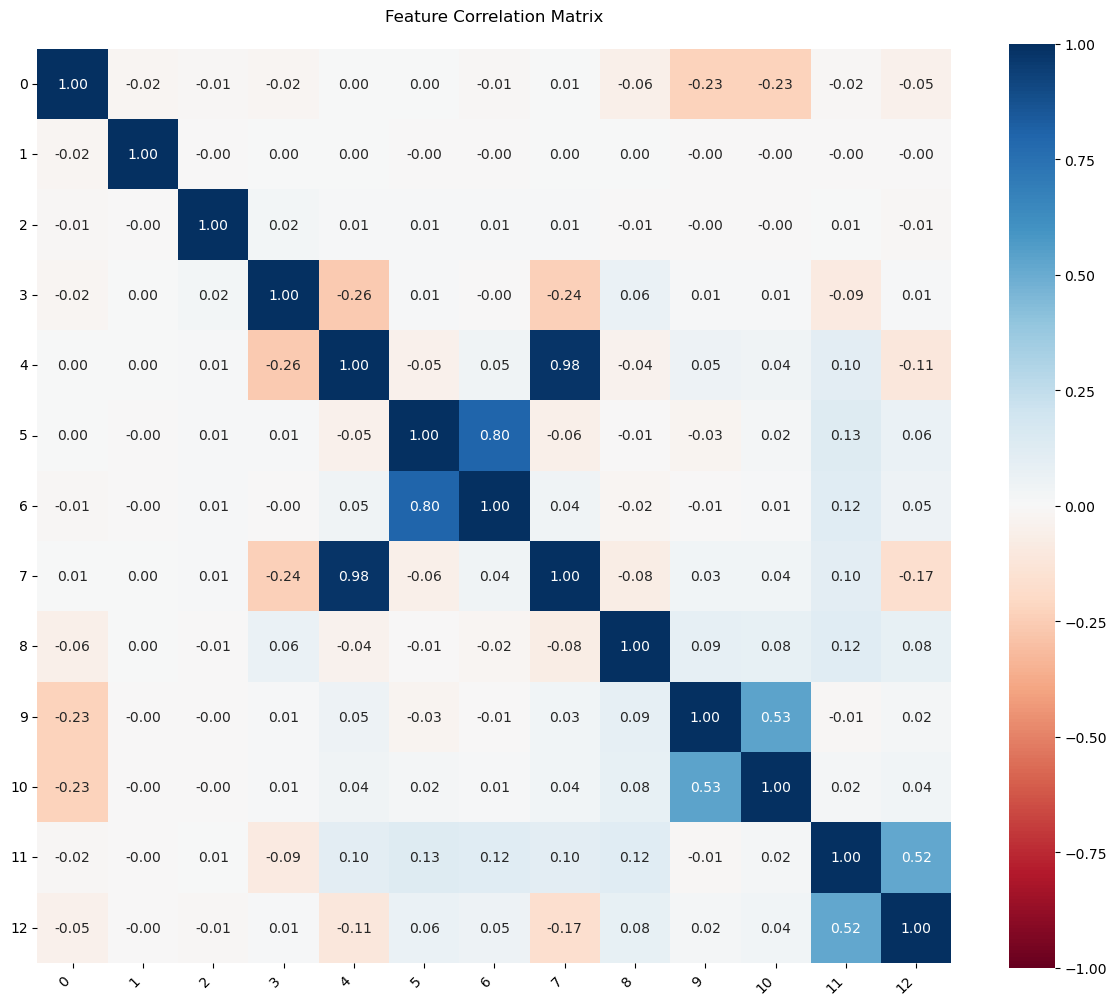


Strong correlations (|correlation| > 0.5):
----------------------------------------
DISTANCE vs SCHEDULED_TIME: 0.978
SCHEDULED_DEPARTURE_MINUTES vs SCHEDULED_ARRIVAL_MINUTES: 0.801
ORIGIN_AIRPORT_ENCODED vs DESTINATION_AIRPORT_ENCODED: 0.532
DEPARTURE_DELAY vs ARRIVAL_DELAY: 0.516


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl

# Define numeric columns first
numeric_columns = [
    'MONTH', 
    'DAY', 
    'DAY_OF_WEEK',
    'FLIGHT_NUMBER', 
    'DISTANCE',
    'SCHEDULED_DEPARTURE_MINUTES', 
    'SCHEDULED_ARRIVAL_MINUTES',
    'SCHEDULED_TIME',
    'AIRLINE_ENCODED',
    'ORIGIN_AIRPORT_ENCODED',
    'DESTINATION_AIRPORT_ENCODED',
    'DEPARTURE_DELAY',
    'ARRIVAL_DELAY'
]

def create_correlation_plot(df):
    # Calculate correlation matrix
    corr_matrix = df.select(numeric_columns).corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))
    
    # Create heatmap
    sns.heatmap(corr_matrix, 
                annot=True,          # Show correlation values
                cmap='RdBu',         # Red-Blue diverging colormap
                center=0,            # Center the colormap at 0
                fmt='.2f',           # Format correlation values to 2 decimal places
                square=True,         # Make the plot square-shaped
                vmin=-1, vmax=1)     # Set correlation range
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # Add title
    plt.title('Feature Correlation Matrix', pad=20)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return plt

def print_strong_correlations(df, threshold=0.5):
    corr_matrix = df.select(numeric_columns).corr()
    
    print("\nStrong correlations (|correlation| > 0.5):")
    print("----------------------------------------")
    
    # Iterate through upper triangle of correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            correlation = corr_matrix[i, j]
            if abs(correlation) > threshold:
                print(f"{corr_matrix.columns[i]} vs {corr_matrix.columns[j]}: {correlation:.3f}")

# Create and display correlation plot
correlation_plot = create_correlation_plot(processed_df)
plt.show()

# Print strong correlations
print_strong_correlations(processed_df)

Looking at the correlation matrix, here are the key insights for delay predictions:
1. Most Important Relationship:
DEPARTURE_DELAY vs ARRIVAL_DELAY: Strong positive correlation (0.52)
This indicates that departure delays strongly influence arrival delays
Makes sense as a delayed departure usually leads to delayed arrival
Other Notable Correlations:
DISTANCE vs SCHEDULED_TIME: Strong correlation (0.98)
Logical relationship but not directly predictive of delays
ORIGIN_AIRPORT_ENCODED vs DESTINATION_AIRPORT_ENCODED: Moderate correlation (0.53)
Suggests certain route patterns
Weak but Relevant Correlations:
Weather/seasonal indicators (MONTH, DAY, DAY_OF_WEEK) show weak correlations
FLIGHT_NUMBER and AIRLINE_ENCODED show weak correlations
For prediction purposes:
For Departure Delay prediction:
Airport encodings (origin/destination)
Scheduled departure time
Route characteristics (distance/scheduled time)
For Arrival Delay prediction:
Departure delay (strongest predictor if available)
Airport encodings
Route characteristics
Scheduled arrival time
The relatively low correlations across most features suggest that delay prediction is complex and might require:
Non-linear feature relationships
Feature engineering
Additional external data (like weather)
Time-based aggregations


Analyzing flight delays...


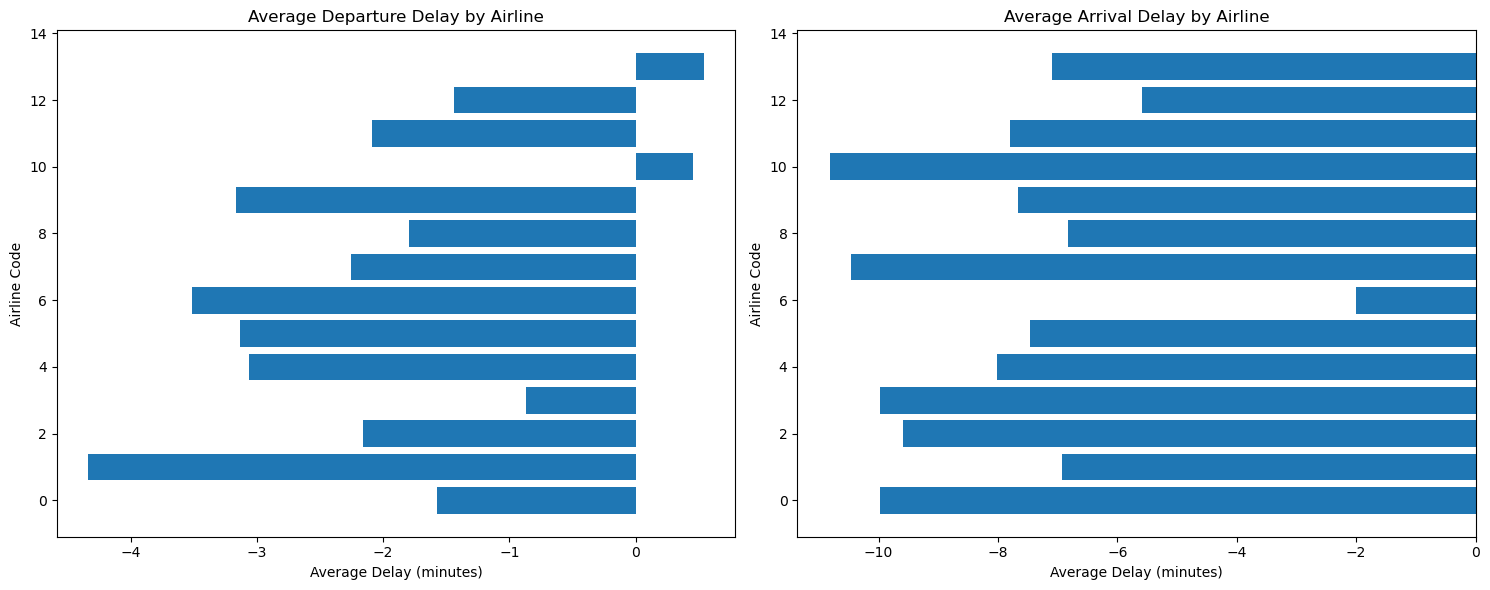


Airline Delay Statistics (sorted by departure delay):
shape: (14, 4)
┌─────────────────┬─────────────────────┬───────────────────┬──────────────┐
│ AIRLINE_ENCODED ┆ avg_departure_delay ┆ avg_arrival_delay ┆ flight_count │
│ ---             ┆ ---                 ┆ ---               ┆ ---          │
│ i64             ┆ f64                 ┆ f64               ┆ u32          │
╞═════════════════╪═════════════════════╪═══════════════════╪══════════════╡
│ 13              ┆ 0.544357            ┆ -7.099493         ┆ 926846       │
│ 10              ┆ 0.453199            ┆ -10.82123         ┆ 265828       │
│ 3               ┆ -0.867272           ┆ -9.973382         ┆ 607632       │
│ 12              ┆ -1.437556           ┆ -5.588177         ┆ 28097        │
│ 0               ┆ -1.576347           ┆ -9.983827         ┆ 424411       │
│ …               ┆ …                   ┆ …                 ┆ …            │
│ 4               ┆ -3.061251           ┆ -8.01566          ┆ 396241       │
│ 5   

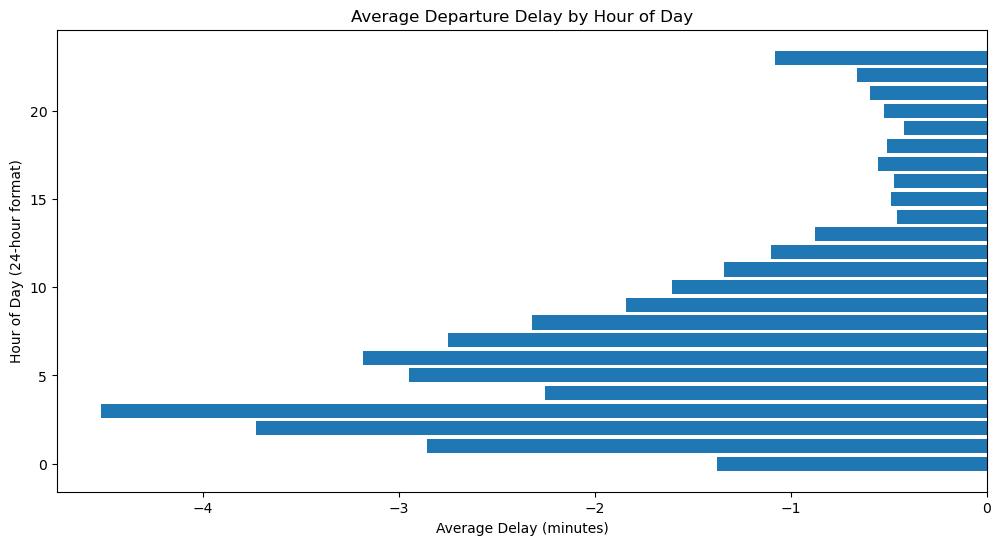


Time of Day Delay Statistics:
shape: (24, 4)
┌────────────────┬─────────────────────┬───────────────────┬──────────────┐
│ departure_hour ┆ avg_departure_delay ┆ avg_arrival_delay ┆ flight_count │
│ ---            ┆ ---                 ┆ ---               ┆ ---          │
│ f64            ┆ f64                 ┆ f64               ┆ u32          │
╞════════════════╪═════════════════════╪═══════════════════╪══════════════╡
│ 0.0            ┆ -1.376942           ┆ -9.82404          ┆ 8752         │
│ 1.0            ┆ -2.857778           ┆ -10.226325        ┆ 2925         │
│ 2.0            ┆ -3.731939           ┆ -10.846008        ┆ 1052         │
│ 3.0            ┆ -4.518966           ┆ -12.586207        ┆ 580          │
│ 4.0            ┆ -2.253886           ┆ -10.098446        ┆ 386          │
│ …              ┆ …                   ┆ …                 ┆ …            │
│ 19.0           ┆ -0.424664           ┆ -7.97363          ┆ 201173       │
│ 20.0           ┆ -0.523303           ┆ -

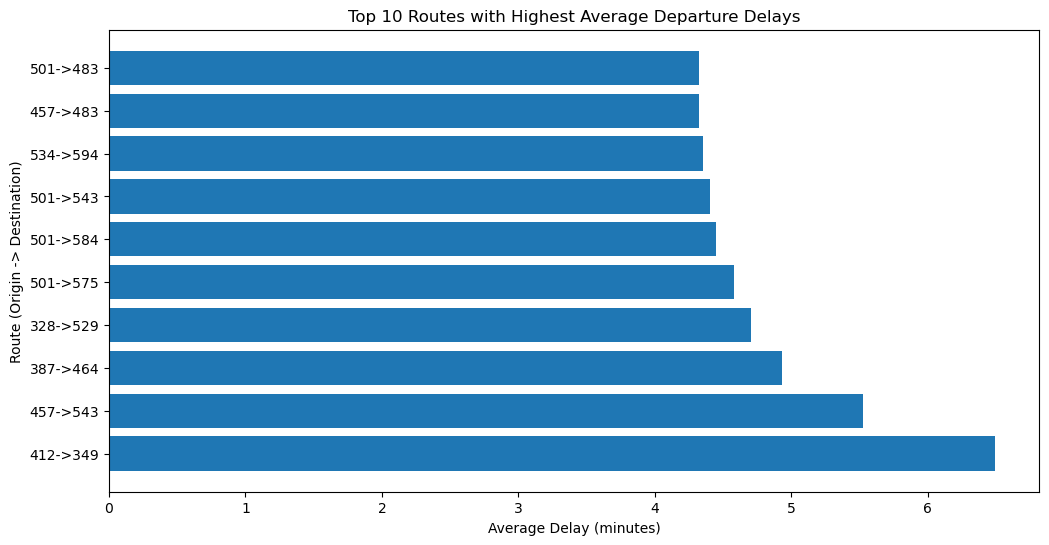


Top 10 Most Delayed Routes:
shape: (10, 5)
┌────────────────────────┬─────────────────────────────┬─────────────────────┬───────────────────┬──────────────┐
│ ORIGIN_AIRPORT_ENCODED ┆ DESTINATION_AIRPORT_ENCODED ┆ avg_departure_delay ┆ avg_arrival_delay ┆ flight_count │
│ ---                    ┆ ---                         ┆ ---                 ┆ ---               ┆ ---          │
│ i64                    ┆ i64                         ┆ f64                 ┆ f64               ┆ u32          │
╞════════════════════════╪═════════════════════════════╪═════════════════════╪═══════════════════╪══════════════╡
│ 412                    ┆ 349                         ┆ 6.490196            ┆ -8.437908         ┆ 153          │
│ 457                    ┆ 543                         ┆ 5.527778            ┆ -12.123016        ┆ 252          │
│ 387                    ┆ 464                         ┆ 4.928571            ┆ -3.642857         ┆ 168          │
│ 328                    ┆ 529              

In [20]:
import polars as pl
import matplotlib.pyplot as plt

def plot_airline_delays(df):
    # Calculate average delays by airline
    airline_delays = (df
        .group_by('AIRLINE_ENCODED')
        .agg([
            pl.col('DEPARTURE_DELAY').mean().alias('avg_departure_delay'),
            pl.col('ARRIVAL_DELAY').mean().alias('avg_arrival_delay'),
            pl.col('DEPARTURE_DELAY').count().alias('flight_count')
        ])
        .sort('avg_departure_delay', descending=True))
    
    # Convert to pandas for easier plotting
    airline_delays_pd = airline_delays.to_pandas()
    
    # Create figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot departure delays
    ax1.barh(airline_delays_pd['AIRLINE_ENCODED'], 
             airline_delays_pd['avg_departure_delay'])
    ax1.set_title('Average Departure Delay by Airline')
    ax1.set_xlabel('Average Delay (minutes)')
    ax1.set_ylabel('Airline Code')
    
    # Plot arrival delays
    ax2.barh(airline_delays_pd['AIRLINE_ENCODED'], 
             airline_delays_pd['avg_arrival_delay'])
    ax2.set_title('Average Arrival Delay by Airline')
    ax2.set_xlabel('Average Delay (minutes)')
    ax2.set_ylabel('Airline Code')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\nAirline Delay Statistics (sorted by departure delay):")
    print(airline_delays)

def plot_time_of_day_delays(df):
    # Create time bins (24 hours)
    processed_df_with_hour = df.with_columns([
        (pl.col('SCHEDULED_DEPARTURE_MINUTES') / 60).floor().alias('departure_hour')
    ])
    
    # Calculate average delays by hour
    hourly_delays = (processed_df_with_hour
        .group_by('departure_hour')
        .agg([
            pl.col('DEPARTURE_DELAY').mean().alias('avg_departure_delay'),
            pl.col('ARRIVAL_DELAY').mean().alias('avg_arrival_delay'),
            pl.col('DEPARTURE_DELAY').count().alias('flight_count')
        ])
        .sort('departure_hour'))
    
    # Convert to pandas for plotting
    hourly_delays_pd = hourly_delays.to_pandas()
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.barh(hourly_delays_pd['departure_hour'], 
             hourly_delays_pd['avg_departure_delay'])
    plt.title('Average Departure Delay by Hour of Day')
    plt.xlabel('Average Delay (minutes)')
    plt.ylabel('Hour of Day (24-hour format)')
    plt.show()
    
    print("\nTime of Day Delay Statistics:")
    print(hourly_delays)

def plot_route_delays(df):
    # Calculate average delays by route
    route_delays = (df
        .group_by(['ORIGIN_AIRPORT_ENCODED', 'DESTINATION_AIRPORT_ENCODED'])
        .agg([
            pl.col('DEPARTURE_DELAY').mean().alias('avg_departure_delay'),
            pl.col('ARRIVAL_DELAY').mean().alias('avg_arrival_delay'),
            pl.col('DEPARTURE_DELAY').count().alias('flight_count')
        ])
        .filter(pl.col('flight_count') > 100)  # Filter routes with sufficient flights
        .sort('avg_departure_delay', descending=True))
    
    # Take top 10 routes
    top_10_routes = route_delays.head(10)
    
    # Convert to pandas for plotting
    top_10_routes_pd = top_10_routes.to_pandas()
    
    # Create route labels
    route_labels = [f"{org}->{dst}" for org, dst in 
                   zip(top_10_routes_pd['ORIGIN_AIRPORT_ENCODED'], 
                       top_10_routes_pd['DESTINATION_AIRPORT_ENCODED'])]
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(route_labels)), top_10_routes_pd['avg_departure_delay'])
    plt.yticks(range(len(route_labels)), route_labels)
    plt.title('Top 10 Routes with Highest Average Departure Delays')
    plt.xlabel('Average Delay (minutes)')
    plt.ylabel('Route (Origin -> Destination)')
    plt.show()
    
    print("\nTop 10 Most Delayed Routes:")
    print(top_10_routes)

# Run all analyses
print("Analyzing flight delays...")
plot_airline_delays(processed_df)
plot_time_of_day_delays(processed_df)
plot_route_delays(processed_df)

# Additional statistics
def print_delay_statistics(df):
    stats = df.select([
        pl.col('DEPARTURE_DELAY').mean().alias('avg_departure_delay'),
        pl.col('DEPARTURE_DELAY').std().alias('std_departure_delay'),
        pl.col('ARRIVAL_DELAY').mean().alias('avg_arrival_delay'),
        pl.col('ARRIVAL_DELAY').std().alias('std_arrival_delay'),
    ])
    
    print("\nOverall Delay Statistics:")
    print(stats)

print_delay_statistics(processed_df)

# Looking at the bar plots for departure and arrival delays by airline:
Departure Delays (Left Plot):
Airlines are coded from 0-14 on the y-axis
Airline code 13 appears to have the highest average departure delay
Airline code 6 shows relatively lower departure delays
Most airlines show some level of departure delay (positive values)
Arrival Delays (Right Plot):
Similar pattern to departure delays
Most airlines show arrival delays correlating with their departure delays
The scale appears similar between arrival and departure delays

In [21]:
def engineer_and_process_features(df):
    """
    Engineer features, handle outliers, and scale appropriately
    """
    # First, create all features
    df_engineered = df.with_columns([
        # Time-based features
        (pl.col('SCHEDULED_DEPARTURE_MINUTES') / 60).floor().alias('HOUR'),
        (pl.col('DAY_OF_WEEK').is_in([6, 7])).cast(pl.Int32).alias('IS_WEEKEND'),
        
        # Distance-based features
        (pl.col('DISTANCE') / 500).floor().alias('DISTANCE_CATEGORY'),
        
        # Interaction features
        (pl.col('DISTANCE') * pl.col('SCHEDULED_DEPARTURE_MINUTES')).alias('DISTANCE_TIME'),
        
        # Season
        pl.when(pl.col('MONTH').is_in([12, 1, 2])).then(0)
          .when(pl.col('MONTH').is_in([3, 4, 5])).then(1)
          .when(pl.col('MONTH').is_in([6, 7, 8])).then(2)
          .otherwise(3).alias('SEASON'),
          
        # Peak hours
        pl.when((pl.col('SCHEDULED_DEPARTURE_MINUTES') / 60).is_between(7, 9)).then(1)
          .when((pl.col('SCHEDULED_DEPARTURE_MINUTES') / 60).is_between(16, 18)).then(1)
          .otherwise(0).alias('IS_PEAK_HOUR')
    ])

    # Separate features by type
    numerical_features = ['DISTANCE_TIME']  # Only continuous numerical feature
    ordinal_features = ['HOUR', 'DISTANCE_CATEGORY', 'SEASON']  # Ordered categorical features
    binary_features = ['IS_WEEKEND', 'IS_PEAK_HOUR']  # Binary features

    # 1. Handle outliers for continuous numerical features
    for col in numerical_features:
        Q1 = df_engineered[col].quantile(0.25)
        Q3 = df_engineered[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_engineered = df_engineered.with_columns([
            pl.when(pl.col(col) < lower_bound).then(lower_bound)
              .when(pl.col(col) > upper_bound).then(upper_bound)
              .otherwise(pl.col(col)).alias(col)
        ])

    # 2. Scale numerical features
    scaler = StandardScaler()
    if numerical_features:  # If we have numerical features
        scaled_num = scaler.fit_transform(df_engineered.select(numerical_features).to_numpy())
        for i, col in enumerate(numerical_features):
            df_engineered = df_engineered.with_columns([
                pl.Series(name=f"{col}_SCALED", values=scaled_num[:, i])
            ])

    # 3. Scale ordinal features (separately from continuous features)
    ordinal_scaler = StandardScaler()
    if ordinal_features:
        scaled_ord = ordinal_scaler.fit_transform(df_engineered.select(ordinal_features).to_numpy())
        for i, col in enumerate(ordinal_features):
            df_engineered = df_engineered.with_columns([
                pl.Series(name=f"{col}_SCALED", values=scaled_ord[:, i])
            ])

    # 4. Keep binary features as is (no scaling needed)
    
    # 5. Drop original unscaled numerical and ordinal columns
    columns_to_drop = numerical_features + ordinal_features
    df_engineered = df_engineered.drop(columns_to_drop)

    # Print summary statistics for verification
    print("\nFeature Engineering Summary:")
    print("\nScaled Numerical Features:")
    for col in [f"{f}_SCALED" for f in numerical_features]:
        stats = df_engineered.select([
            pl.col(col).mean().alias('mean'),
            pl.col(col).std().alias('std'),
            pl.col(col).min().alias('min'),
            pl.col(col).max().alias('max')
        ])
        print(f"\n{col}:")
        print(stats)

    print("\nScaled Ordinal Features:")
    for col in [f"{f}_SCALED" for f in ordinal_features]:
        stats = df_engineered.select([
            pl.col(col).mean().alias('mean'),
            pl.col(col).std().alias('std'),
            pl.col(col).min().alias('min'),
            pl.col(col).max().alias('max')
        ])
        print(f"\n{col}:")
        print(stats)

    return df_engineered

# Usage
processed_df = engineer_and_process_features(processed_df)



Feature Engineering Summary:

Scaled Numerical Features:

DISTANCE_TIME_SCALED:
shape: (1, 4)
┌────────────┬─────┬───────────┬─────────┐
│ mean       ┆ std ┆ min       ┆ max     │
│ ---        ┆ --- ┆ ---       ┆ ---     │
│ f64        ┆ f64 ┆ f64       ┆ f64     │
╞════════════╪═════╪═══════════╪═════════╡
│ 4.6151e-17 ┆ 1.0 ┆ -1.469869 ┆ 2.54777 │
└────────────┴─────┴───────────┴─────────┘

Scaled Ordinal Features:

HOUR_SCALED:
shape: (1, 4)
┌─────────────┬─────┬───────────┬──────────┐
│ mean        ┆ std ┆ min       ┆ max      │
│ ---         ┆ --- ┆ ---       ┆ ---      │
│ f64         ┆ f64 ┆ f64       ┆ f64      │
╞═════════════╪═════╪═══════════╪══════════╡
│ -1.5286e-16 ┆ 1.0 ┆ -2.655859 ┆ 2.162453 │
└─────────────┴─────┴───────────┴──────────┘

DISTANCE_CATEGORY_SCALED:
shape: (1, 4)
┌─────────────┬─────┬───────────┬─────────┐
│ mean        ┆ std ┆ min       ┆ max     │
│ ---         ┆ --- ┆ ---       ┆ ---     │
│ f64         ┆ f64 ┆ f64       ┆ f64     │
╞═════════════╪═══

In [22]:
added_features_df=engineer_and_process_features(processed_df)


Feature Engineering Summary:

Scaled Numerical Features:

DISTANCE_TIME_SCALED:
shape: (1, 4)
┌────────────┬─────┬───────────┬─────────┐
│ mean       ┆ std ┆ min       ┆ max     │
│ ---        ┆ --- ┆ ---       ┆ ---     │
│ f64        ┆ f64 ┆ f64       ┆ f64     │
╞════════════╪═════╪═══════════╪═════════╡
│ 4.6151e-17 ┆ 1.0 ┆ -1.469869 ┆ 2.54777 │
└────────────┴─────┴───────────┴─────────┘

Scaled Ordinal Features:

HOUR_SCALED:
shape: (1, 4)
┌─────────────┬─────┬───────────┬──────────┐
│ mean        ┆ std ┆ min       ┆ max      │
│ ---         ┆ --- ┆ ---       ┆ ---      │
│ f64         ┆ f64 ┆ f64       ┆ f64      │
╞═════════════╪═════╪═══════════╪══════════╡
│ -1.5286e-16 ┆ 1.0 ┆ -2.655859 ┆ 2.162453 │
└─────────────┴─────┴───────────┴──────────┘

DISTANCE_CATEGORY_SCALED:
shape: (1, 4)
┌─────────────┬─────┬───────────┬─────────┐
│ mean        ┆ std ┆ min       ┆ max     │
│ ---         ┆ --- ┆ ---       ┆ ---     │
│ f64         ┆ f64 ┆ f64       ┆ f64     │
╞═════════════╪═══

In [23]:
added_features_df.head()

YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SCHEDULED_DEPARTURE_MINUTES,DEPARTURE_TIME_MINUTES,SCHEDULED_ARRIVAL_MINUTES,ARRIVAL_TIME_MINUTES,AIRLINE_ENCODED,ORIGIN_AIRPORT_ENCODED,DESTINATION_AIRPORT_ENCODED,DEPARTURE_DELAY_SCALED,ARRIVAL_DELAY_SCALED,AIR_SYSTEM_DELAY_SCALED,SECURITY_DELAY_SCALED,AIRLINE_DELAY_SCALED,LATE_AIRCRAFT_DELAY_SCALED,WEATHER_DELAY_SCALED,TAXI_OUT_SCALED,SCHEDULED_TIME_SCALED,ELAPSED_TIME_SCALED,AIR_TIME_SCALED,TAXI_IN_SCALED,DISTANCE_SCALED,SCHEDULED_DEPARTURE_MINUTES_SCALED,DEPARTURE_TIME_MINUTES_SCALED,SCHEDULED_ARRIVAL_MINUTES_SCALED,ARRIVAL_TIME_MINUTES_SCALED,IS_WEEKEND,IS_PEAK_HOUR,DISTANCE_TIME_SCALED,HOUR_SCALED,DISTANCE_CATEGORY_SCALED,SEASON_SCALED
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,i32,f64,f64,f64,f64
2015,1,1,4,98,-11,21,205,194,169,1448,4,-22,0,0,0,0,0,5.0,1434.0,270.0,248.0,1,323,584,-1.449984,-1.359923,0.0,0.0,0.0,0.0,0.0,1.403287,1.592718,1.568358,1.501535,-0.821934,1.883311,-2.716853,2.244942,-2.080824,-2.132204,0,0,-1.450553,-2.655859,1.310403,-1.409281
2015,1,1,4,135,-1,11,235,215,199,1448,5,-21,0,0,0,0,0,25.0,24.0,200.0,179.0,1,583,324,0.051331,-1.259263,0.0,0.0,0.0,0.0,0.0,-0.620045,2.177274,1.98964,2.114823,-0.456535,1.883311,-2.647388,-2.63521,-2.316393,-2.36443,0,0,-1.368111,-2.655859,1.310403,-1.409281
2015,1,1,4,806,-5,18,217,230,206,1589,6,8,0,0,0,0,0,25.0,20.0,362.0,370.0,3,584,523,-0.549195,1.65987,0.0,0.0,0.0,0.0,0.0,0.796287,1.82654,2.290556,2.257924,-0.091136,2.2284,-2.647388,-2.649055,-1.771218,-1.7216,0,0,-1.358076,-2.655859,2.45909,-1.409281
2015,1,1,4,612,-6,11,181,170,154,1299,5,-17,0,0,0,0,0,25.0,19.0,326.0,309.0,8,480,523,-0.699327,-0.856624,0.0,0.0,0.0,0.0,0.0,-0.620045,1.125074,1.086892,1.194891,-0.456535,1.518643,-2.647388,-2.652516,-1.892368,-1.926902,0,0,-1.378715,-2.655859,1.310403,-1.409281
2015,1,1,4,1112,-11,17,195,193,173,1464,3,-13,0,0,0,0,0,30.0,19.0,345.0,332.0,0,584,393,-1.449984,-0.453985,0.0,0.0,0.0,0.0,0.0,0.593954,1.397867,1.548297,1.583307,-1.187333,1.92247,-2.630021,-2.652516,-1.828428,-1.849493,0,0,-1.346134,-2.655859,1.310403,-1.409281


In [25]:
import polars as pl
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

def select_features_and_train(df):
    """
    Select relevant features and train model for departure delay prediction
    """
    # Select most relevant features for departure delay prediction
    selected_features = [
        # Time-related scaled features
        'SCHEDULED_DEPARTURE_MINUTES_SCALED',
        'SCHEDULED_TIME_SCALED',
        
        # Flight-specific scaled features
        'DISTANCE_SCALED',
        'TAXI_OUT_SCALED',
        
        # Airport and Airline features
        'AIRLINE_ENCODED',
        'ORIGIN_AIRPORT_ENCODED',
        'DESTINATION_AIRPORT_ENCODED',
        
        # Historical delay features (scaled)
        'AIR_SYSTEM_DELAY_SCALED',
        'AIRLINE_DELAY_SCALED',
        'LATE_AIRCRAFT_DELAY_SCALED',
        'WEATHER_DELAY_SCALED',
        
        # Engineered features
        'IS_WEEKEND',
        'IS_PEAK_HOUR',
        'DISTANCE_TIME_SCALED',
        'SEASON_SCALED'
    ]

    # Prepare features and target
    X = df.select(selected_features).to_numpy()
    y = df['DEPARTURE_DELAY_SCALED'].to_numpy()

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Initialize models
    models = {
        'Random Forest': RandomForestRegressor(
            n_estimators=200,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            n_jobs=-1
        ),
        'Gradient Boosting': GradientBoostingRegressor(
            n_estimators=200,
            max_depth=8,
            learning_rate=0.1,
            random_state=42
        )
    }

    # Train and evaluate models
    results = {}
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Cross validation score
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
        
        print(f"\n{name} Results:")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"Root Mean Squared Error: {rmse:.4f}")
        print(f"Mean Absolute Error: {mae:.4f}")
        print(f"R2 Score: {r2:.4f}")
        print(f"Cross-validation R2 scores: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
        
        # Store results
        results[name] = {
            'model': model,
            'predictions': y_pred,
            'actual': y_test,
            'metrics': {
                'mse': mse,
                'rmse': rmse,
                'mae': mae,
                'r2': r2
            }
        }
        
        # Feature importance for Random Forest
        if name == 'Random Forest':
            importance = dict(zip(selected_features, model.feature_importances_))
            print("\nFeature Importance:")
            for feat, imp in sorted(importance.items(), key=lambda x: x[1], reverse=True):
                print(f"{feat}: {imp:.4f}")

            # Plot feature importance
            plt.figure(figsize=(12, 6))
            features_imp = pd.DataFrame({
                'feature': selected_features,
                'importance': model.feature_importances_
            }).sort_values('importance', ascending=True)
            
            plt.barh(range(len(features_imp)), features_imp['importance'])
            plt.yticks(range(len(features_imp)), features_imp['feature'])
            plt.xlabel('Feature Importance')
            plt.title('Random Forest Feature Importance')
            plt.tight_layout()
            plt.show()

    # Plot actual vs predicted for best model
    best_model_name = min(results.keys(), key=lambda k: results[k]['metrics']['rmse'])
    plt.figure(figsize=(10, 6))
    plt.scatter(results[best_model_name]['actual'], 
                results[best_model_name]['predictions'], 
                alpha=0.5)
    plt.plot([min(y_test), max(y_test)], 
             [min(y_test), max(y_test)], 
             'r--', lw=2)
    plt.xlabel('Actual Delay')
    plt.ylabel('Predicted Delay')
    plt.title(f'{best_model_name}: Actual vs Predicted Delay')
    plt.tight_layout()
    plt.show()

    return results

# Run the analysis
results = select_features_and_train(added_features_df[:50000])


Random Forest Results:
Mean Squared Error: 1.0730
Root Mean Squared Error: 1.0359
Mean Absolute Error: 0.7756
R2 Score: 0.1633
Cross-validation R2 scores: 0.1127 (+/- 0.0478)

Feature Importance:
DISTANCE_TIME_SCALED: 0.1802
SCHEDULED_DEPARTURE_MINUTES_SCALED: 0.1659
ORIGIN_AIRPORT_ENCODED: 0.1251
TAXI_OUT_SCALED: 0.1133
AIRLINE_ENCODED: 0.1112
SCHEDULED_TIME_SCALED: 0.0947
DESTINATION_AIRPORT_ENCODED: 0.0913
DISTANCE_SCALED: 0.0847
IS_WEEKEND: 0.0271
IS_PEAK_HOUR: 0.0065
AIR_SYSTEM_DELAY_SCALED: 0.0000
AIRLINE_DELAY_SCALED: 0.0000
LATE_AIRCRAFT_DELAY_SCALED: 0.0000
WEATHER_DELAY_SCALED: 0.0000
SEASON_SCALED: 0.0000


NameError: name 'pd' is not defined

<Figure size 1200x600 with 0 Axes>


Random Forest Results:
Mean Squared Error: 1.0730
Root Mean Squared Error: 1.0359
Mean Absolute Error: 0.7756
R2 Score: 0.1633
Cross-validation R2 scores: 0.1127 (+/- 0.0478)

Feature Importance:
DISTANCE_TIME_SCALED: 0.1802
SCHEDULED_DEPARTURE_MINUTES_SCALED: 0.1659
ORIGIN_AIRPORT_ENCODED: 0.1251
TAXI_OUT_SCALED: 0.1133
AIRLINE_ENCODED: 0.1112
SCHEDULED_TIME_SCALED: 0.0947
DESTINATION_AIRPORT_ENCODED: 0.0913
DISTANCE_SCALED: 0.0847
IS_WEEKEND: 0.0271
IS_PEAK_HOUR: 0.0065
AIR_SYSTEM_DELAY_SCALED: 0.0000
AIRLINE_DELAY_SCALED: 0.0000
LATE_AIRCRAFT_DELAY_SCALED: 0.0000
WEATHER_DELAY_SCALED: 0.0000
SEASON_SCALED: 0.0000


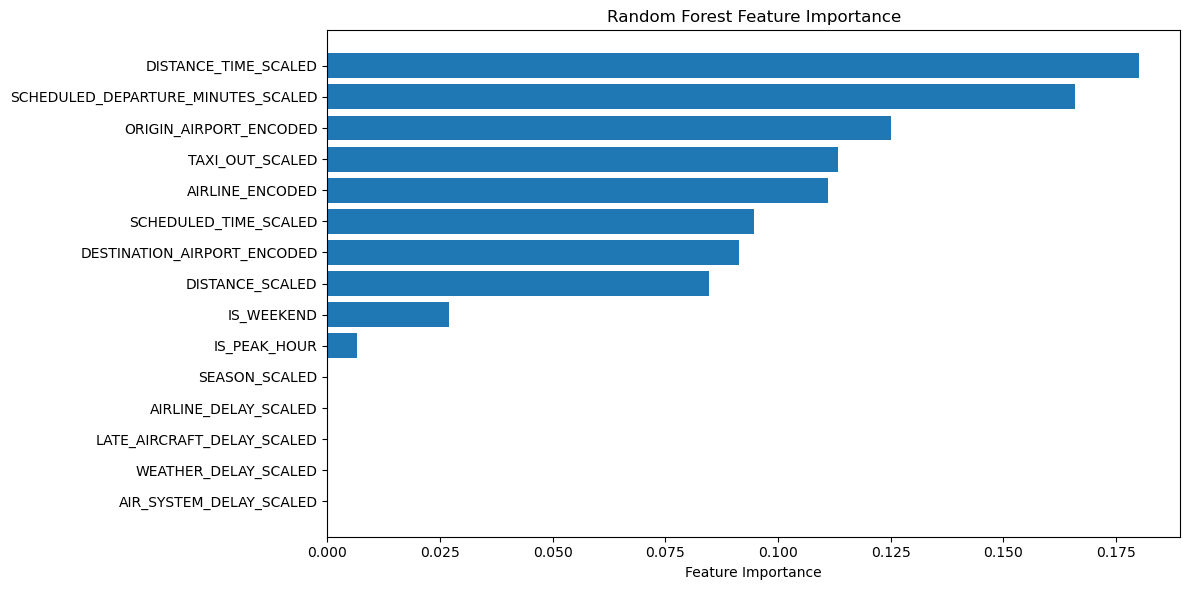


Gradient Boosting Results:
Mean Squared Error: 1.0796
Root Mean Squared Error: 1.0391
Mean Absolute Error: 0.7796
R2 Score: 0.1582
Cross-validation R2 scores: 0.0887 (+/- 0.0778)


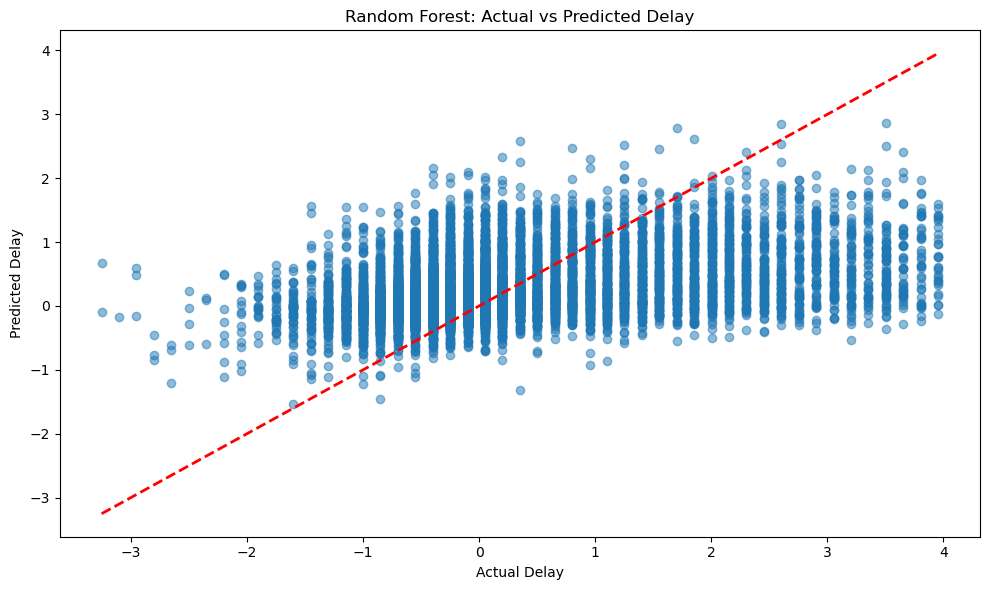

In [27]:
import pandas as pd
import polars as pl
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

def select_features_and_train(df):
    """
    Select relevant features and train model for departure delay prediction
    """
    # Select most relevant features for departure delay prediction
    selected_features = [
        # Time-related scaled features
        'SCHEDULED_DEPARTURE_MINUTES_SCALED',
        'SCHEDULED_TIME_SCALED',
        
        # Flight-specific scaled features
        'DISTANCE_SCALED',
        'TAXI_OUT_SCALED',
        
        # Airport and Airline features
        'AIRLINE_ENCODED',
        'ORIGIN_AIRPORT_ENCODED',
        'DESTINATION_AIRPORT_ENCODED',
        
        # Historical delay features (scaled)
        'AIR_SYSTEM_DELAY_SCALED',
        'AIRLINE_DELAY_SCALED',
        'LATE_AIRCRAFT_DELAY_SCALED',
        'WEATHER_DELAY_SCALED',
        
        # Engineered features
        'IS_WEEKEND',
        'IS_PEAK_HOUR',
        'DISTANCE_TIME_SCALED',
        'SEASON_SCALED'
    ]

    # Prepare features and target
    X = df.select(selected_features).to_numpy()
    y = df['DEPARTURE_DELAY_SCALED'].to_numpy()

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Initialize models
    models = {
        'Random Forest': RandomForestRegressor(
            n_estimators=200,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            n_jobs=-1
        ),
        'Gradient Boosting': GradientBoostingRegressor(
            n_estimators=200,
            max_depth=8,
            learning_rate=0.1,
            random_state=42
        )
    }

    # Train and evaluate models
    results = {}
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Cross validation score
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
        
        print(f"\n{name} Results:")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"Root Mean Squared Error: {rmse:.4f}")
        print(f"Mean Absolute Error: {mae:.4f}")
        print(f"R2 Score: {r2:.4f}")
        print(f"Cross-validation R2 scores: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
        
        # Store results
        results[name] = {
            'model': model,
            'predictions': y_pred,
            'actual': y_test,
            'metrics': {
                'mse': mse,
                'rmse': rmse,
                'mae': mae,
                'r2': r2
            }
        }
        
        # Feature importance for Random Forest
        if name == 'Random Forest':
            importance = dict(zip(selected_features, model.feature_importances_))
            print("\nFeature Importance:")
            for feat, imp in sorted(importance.items(), key=lambda x: x[1], reverse=True):
                print(f"{feat}: {imp:.4f}")

            # Plot feature importance
            plt.figure(figsize=(12, 6))
            features_imp = pd.DataFrame({
                'feature': selected_features,
                'importance': model.feature_importances_
            }).sort_values('importance', ascending=True)
            
            plt.barh(range(len(features_imp)), features_imp['importance'])
            plt.yticks(range(len(features_imp)), features_imp['feature'])
            plt.xlabel('Feature Importance')
            plt.title('Random Forest Feature Importance')
            plt.tight_layout()
            plt.show()

    # Plot actual vs predicted for best model
    best_model_name = min(results.keys(), key=lambda k: results[k]['metrics']['rmse'])
    plt.figure(figsize=(10, 6))
    plt.scatter(results[best_model_name]['actual'], 
                results[best_model_name]['predictions'], 
                alpha=0.5)
    plt.plot([min(y_test), max(y_test)], 
             [min(y_test), max(y_test)], 
             'r--', lw=2)
    plt.xlabel('Actual Delay')
    plt.ylabel('Predicted Delay')
    plt.title(f'{best_model_name}: Actual vs Predicted Delay')
    plt.tight_layout()
    plt.show()

    return results

# Run the analysis
results = select_features_and_train(added_features_df[:50000])